In [53]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import os
import seaborn as sb

In [55]:
filename = "gscpi_df.csv"
path = "C:\\Users\\millen11\\Dropbox\\PC\\Documents\\academia\\rpi\\classes\\fall23\\introToML\\introToMLapps\\project\\dataset\\cleaned"
file_path = os.path.join(path, filename)
gscpi_df = pd.read_csv(file_path)

In [14]:
filename = "epsi_df.csv"
path = "C:\\Users\\millen11\\Dropbox\\PC\\Documents\\academia\\rpi\\classes\\fall23\\introToML\\introToMLapps\\project\\dataset\\cleaned"
file_path = os.path.join(path, filename)
epsi_df = pd.read_csv(file_path)

In [15]:
filename = "ecpi_df.csv"
path = "C:\\Users\\millen11\\Dropbox\\PC\\Documents\\academia\\rpi\\classes\\fall23\\introToML\\introToMLapps\\project\\dataset\\cleaned"
file_path = os.path.join(path, filename)
ecpi_df = pd.read_csv(file_path)

In [42]:
filename = "^GSPC.csv"
path = "C:\\Users\\millen11\\Dropbox\\PC\\Documents\\academia\\rpi\\classes\\fall23\\introToML\\introToMLapps\\project\\dataset\\cleaned"
file_path = os.path.join(path, filename)
sp500_df = pd.read_csv(file_path)

In [57]:
display(gscpi_df.describe())
display(gscpi_df)

,GSCPI
count,165.000000
mean,0.372485
std,1.199785
min,-1.570000
25%,-0.440000
50%,0.080000
75%,0.670000
max,4.320000


,Date,GSCPI
0,2010-01-31,-0.30
1,2010-02-28,-0.14
2,2010-03-31,0.39
3,2010-04-30,0.29
4,2010-05-31,0.41
...,...,...
160,2023-05-31,-1.57
161,2023-06-30,-1.11
162,2023-07-31,-0.86
163,2023-08-31,-1.08


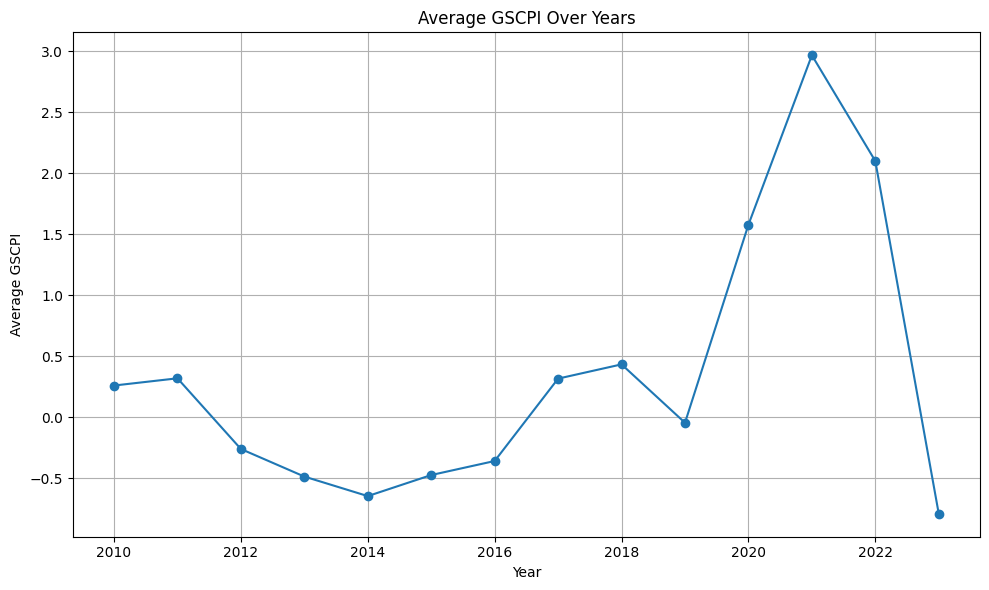

In [60]:
gscpi_df['Date'] = pd.to_datetime(gscpi_df['Date'])

# Extract the year from the 'Date' column
gscpi_df['Year'] = gscpi_df['Date'].dt.year

# Group the data by year and calculate the mean GSCPI value for each year
yearly_gscpi = gscpi_df.groupby('Year')['GSCPI'].mean()

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_gscpi.index, yearly_gscpi.values, marker='o', linestyle='-')
plt.title('Average GSCPI Over Years')
plt.xlabel('Year')
plt.ylabel('Average GSCPI')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

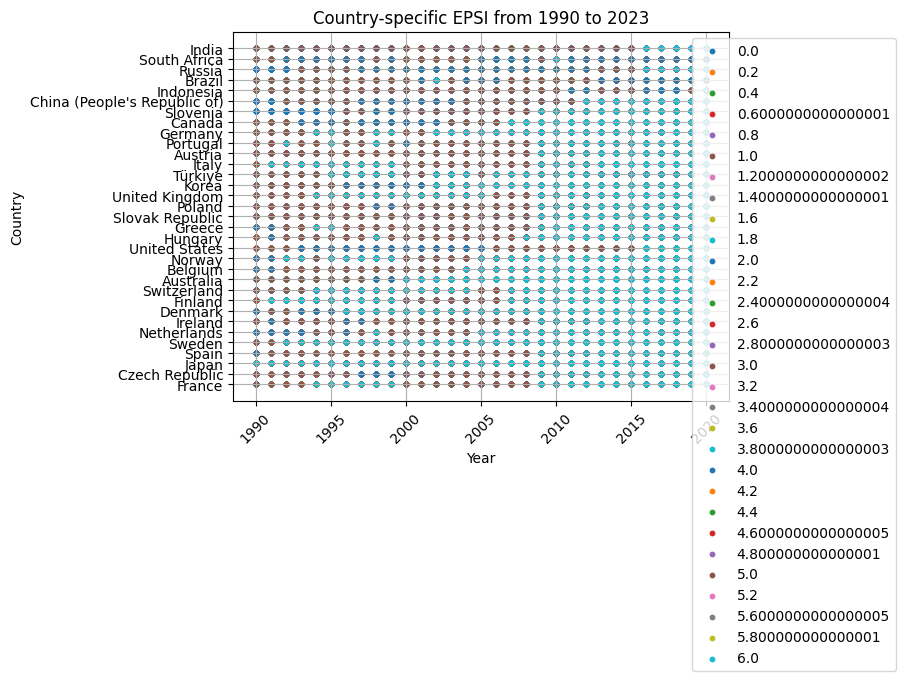

In [50]:
epsi_df["EPSI"] = (epsi_df["EPSI"] / 0.2).round() * 0.2
for epsi, group in epsi_df.groupby('EPSI'):
    plt.scatter(group["Year"], group["Country"], label=epsi, s=10)

plt.xlabel("Year")
plt.ylabel("Country")
plt.title("Country-specific EPSI from 1990 to 2023")
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1))
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [29]:
display(epsi_df.describe())
max_epsi_df = epsi_df.loc[epsi_df['EPSI'] == 6.0]
display(max_epsi_df["Country"].unique())

,Unnamed: 0,Year,EPSI
count,17391.000000,17391.000000,17391.000000
mean,8695.000000,2005.000000,1.828551
std,5020.493601,8.944529,2.023810
min,0.000000,1990.000000,0.000000
25%,4347.500000,1997.000000,0.000000
50%,8695.000000,2005.000000,1.000000
75%,13042.500000,2013.000000,3.000000
max,17390.000000,2020.000000,6.000000


array(['Greece', 'France', 'Switzerland', 'Japan', 'Denmark', 'Italy',
       'Portugal', 'Sweden', 'United States', 'Poland', 'Hungary',
       'Germany', 'Australia', 'Finland', 'Belgium', 'Netherlands',
       'Austria', 'United Kingdom', 'Slovak Republic', 'Czech Republic',
       'Norway', 'Türkiye', 'Canada', 'Korea', 'Spain', 'Ireland',
       'Slovenia', "China (People's Republic of)", 'Russia', 'India',
       'Indonesia', 'Brazil', 'South Africa'], dtype=object)

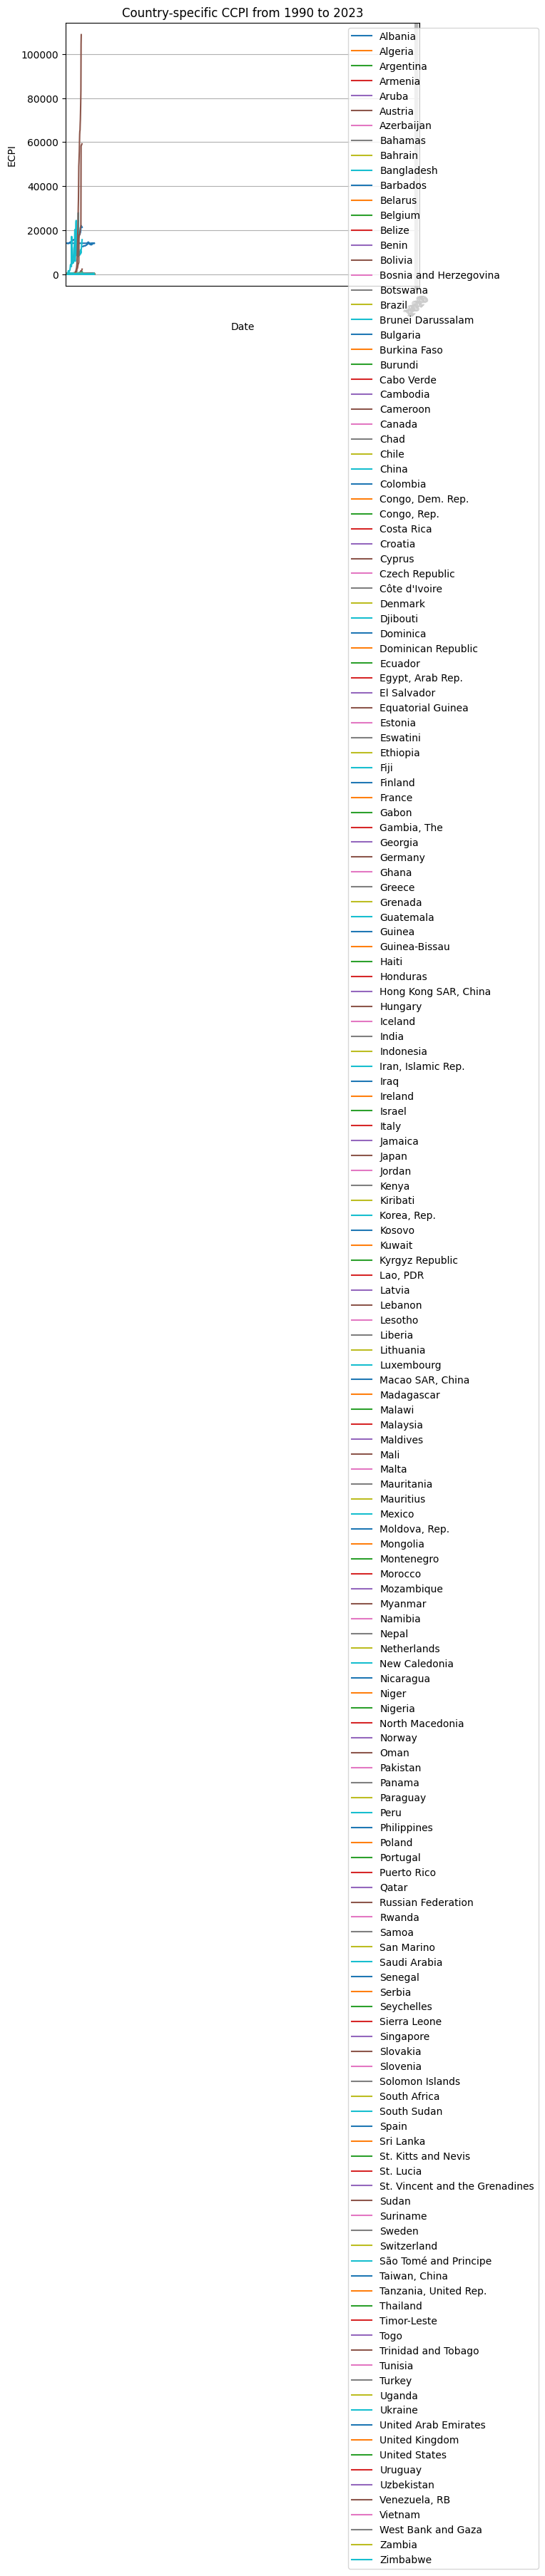

In [44]:
for country, group in ecpi_df.groupby('Country'):
    plt.plot(group["Date"], group["ECPI"], label=country)

plt.xlabel("Date")
plt.ylabel("ECPI")
plt.title("Country-specific CCPI from 1990 to 2023")
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1))

# Customize the tick positions and labels
plt.xticks(rotation=45)
plt.xticks(range(1990, 2024, 5))  # Set tick positions every 5 years
plt.gca().set_xticklabels([str(x) for x in range(1990, 2024, 5)])  # Set corresponding tick labels

plt.grid()  # Add grid lines for better readability
plt.show()

In [32]:
display(ecpi_df.describe())

,ECPI
count,28325.000000
mean,288.286955
std,2328.176110
min,-3.200000
25%,95.000000
50%,102.300000
75%,114.600000
max,108824.000000


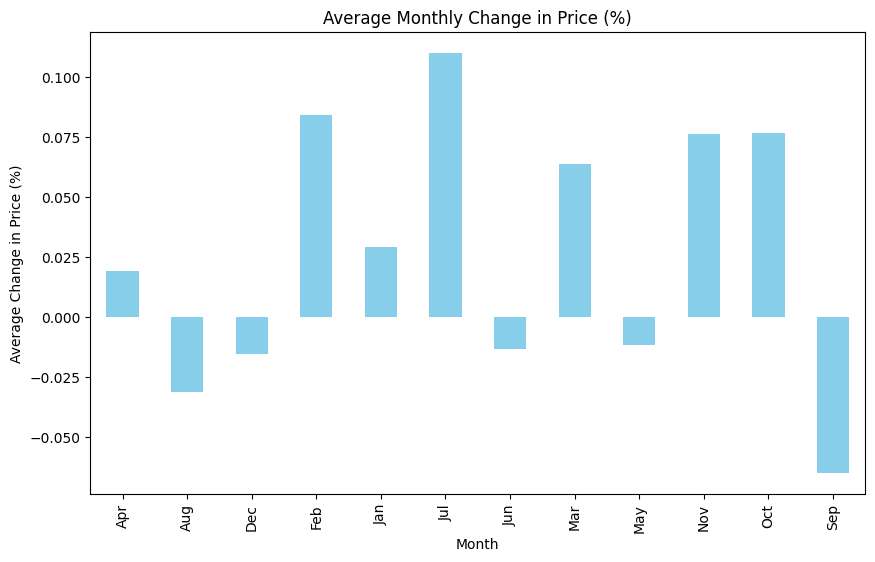

In [48]:
monthly_data = sp500_df.groupby("Month")["Change In Price (%)"].mean()
plt.figure(figsize = (10, 6))
monthly_data.plot(kind = "bar", color = "skyblue")
plt.title("Average Monthly Change in Price (%)")
plt.xlabel("Month")
plt.ylabel("Average Change in Price (%)")

plt.show()

In [46]:
display(sp500_df.describe())

,Unnamed: 0,Open,High,Low,Close,Volume,Region,Change In Price (%),Month,Day of Week
0,2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,3991400000,US & Canada,1.471478,Jan,Monday
1,2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,2491020000,US & Canada,0.340789,Jan,Tuesday
2,2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,4972660000,US & Canada,0.125917,Jan,Wednesday
3,2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,5270680000,US & Canada,0.476992,Jan,Thursday
4,2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,4389590000,US & Canada,0.391046,Jan,Friday
...,...,...,...,...,...,...,...,...,...,...
3474,2023-10-23,4210.399902,4255.839844,4189.220215,4217.040039,3776100000,US & Canada,0.157708,Oct,Monday
3475,2023-10-24,4235.790039,4259.379883,4219.430176,4247.680176,3821820000,US & Canada,0.280706,Oct,Tuesday
3476,2023-10-25,4232.419922,4232.419922,4181.419922,4186.770020,3869370000,US & Canada,-1.078577,Oct,Wednesday
3477,2023-10-26,4175.990234,4183.600098,4127.899902,4137.229980,4277640000,US & Canada,-0.928169,Oct,Thursday


,Open,High,Low,Close,Volume,Change In Price (%)
count,3479.000000,3479.000000,3479.000000,3479.000000,3.479000e+03,3479.000000
mean,2509.739116,2523.494050,2494.904001,2510.167051,3.939663e+09,0.026368
std,1053.152199,1059.487516,1046.348480,1053.066139,9.637827e+08,0.927602
min,1027.650024,1032.949951,1010.909973,1022.580017,0.000000e+00,-6.593353
25%,1638.765015,1647.609985,1630.539978,1639.405029,3.360200e+09,-0.348346
50%,2200.760010,2209.419922,2194.510010,2202.939941,3.778950e+09,0.051634
75%,3218.065063,3229.750000,3200.405029,3219.829956,4.315780e+09,0.486171
max,4804.509766,4818.620117,4780.040039,4796.560059,1.061781e+10,5.487571
